In [ ]:
!pip install pandas pyarrow

In [ ]:
!pip install japanize_matplotlib

In [15]:
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("utsavdey1410/food-nutrition-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bi23014\.cache\kagglehub\datasets\utsavdey1410\food-nutrition-dataset\versions\1


In [21]:
import pandas as pd
import os
import glob

path = "C:/Users/bi23014/.cache/kagglehub/datasets/utsavdey1410/food-nutrition-dataset/versions/1/FINAL FOOD DATASET"
all_files = glob.glob(os.path.join(path, "*.csv"))

df_list = []

for filename in all_files:
     df = pd.read_csv(filename)
     df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)    
merged_df.to_csv("./merged_file.csv", index=False)  # ファイル名を必要に応じて変更してください

In [22]:
path = "./merged_file.csv"
df = pd.read_csv(path, nrows=200)

In [23]:

name = df["food"].to_list()
calory = df["Caloric Value"].to_list()

protein = df["Protein"].to_list()
fat = df["Fat"].to_list()
carbohydrates = df["Carbohydrates"].to_list()

In [24]:
vitamin_a = df["Vitamin A"].to_list()
vitamin_b1 = df["Vitamin B1"].to_list()
vitamin_b2 = df["Vitamin B2"].to_list()
vitamin_b3 = df["Vitamin B3"].to_list()
vitamin_b5 = df["Vitamin B5"].to_list()
vitamin_b6 = df["Vitamin B6"].to_list()
vitamin_c = df["Vitamin C"].to_list()
vitamin_d = df["Vitamin D"].to_list()
vitamin_e = df["Vitamin E"].to_list()
vitamin_k = df["Vitamin K"].to_list()

In [25]:
calcium = df["Calcium"].to_list()
iron = df["Iron"].to_list()
magnesium = df["Magnesium"].to_list()
potassium = df["Potassium"].to_list()
zinc = df["Zinc"].to_list()

#可視化

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

bins = np.arange(0,df['Caloric Value'].max() + 10, 10) # 0から最大値まで10刻みの配列を作成

# カロリーのヒストグラム
plt.hist(calory,bins=bins)
plt.title('カロリー分布')
plt.xlabel('カロリー')
plt.ylabel('頻度')
plt.show()


In [ ]:
plt.hist(protein,bins=50)
plt.title('タンパク質分布')
plt.xlabel('タンパク質')
plt.ylabel('頻度')
plt.show()

In [ ]:
plt.hist(fat,bins=60)
plt.title('脂質分布')
plt.xlabel('脂質')
plt.ylabel('頻度')
plt.xlim(0,300)
plt.show()

In [ ]:
plt.hist(carbohydrates,bins=40)
plt.title('炭水化物分布')
plt.xlabel('炭水化物')
plt.ylabel('頻度')
plt.show()

#続き

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# merged_file.csvを実際のファイル名に置き換えてください
df = pd.read_csv("merged_file.csv")
df = df.drop(columns=['food','Unnamed: 0.1','Unnamed: 0'])
# 相関行列を計算
correlation_matrix = df.corr()
print(correlation_matrix)

# ヒートマップで可視化
plt.figure(figsize=(12, 10))  # 図のサイズを指定
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

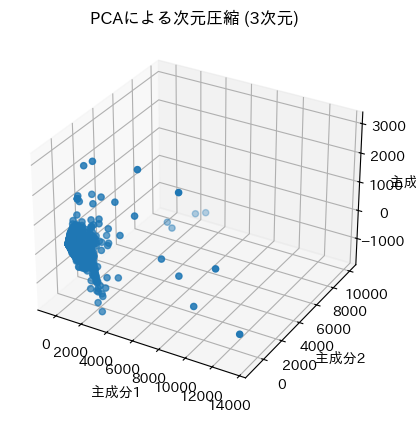

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCAで次元削減
pca = PCA(n_components=3) # 主成分の数を指定
principalComponents = pca.fit_transform(df)

# 次元圧縮されたデータをDataFrameに変換
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# 3次元散布図を作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']

ax.scatter(x, y, z)

ax.set_xlabel("主成分1")
ax.set_ylabel("主成分2")
ax.set_zlabel("主成分3")
ax.set_title('PCAによる次元圧縮 (3次元)')

plt.show()

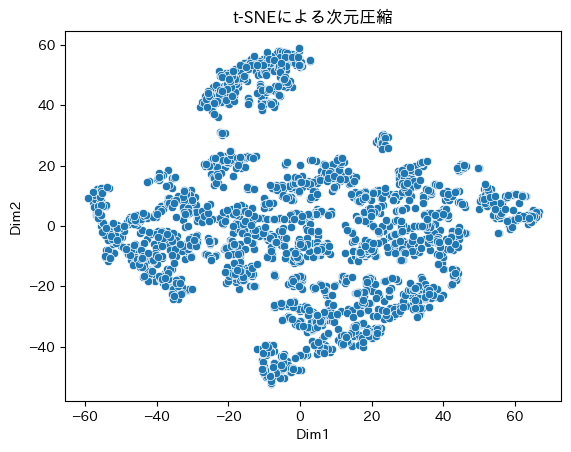

In [ ]:
from sklearn.manifold import TSNE
# t-SNEによる次元圧縮
tsne = TSNE(n_components=2, random_state=42) # n_componentsで次元数を指定
embedded = tsne.fit_transform(df)

# 次元圧縮されたデータをDataFrameに変換
df_embedded = pd.DataFrame(embedded, columns=['Dim1', 'Dim2'])

# 可視化
sns.scatterplot(x='Dim1', y='Dim2', data=df_embedded)
plt.title('t-SNEによる次元圧縮')
plt.show()